In [272]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import datetime
import pytz
import IPython

In [273]:
%%capture
!pip install wandb==0.10.17

In [274]:
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Analise Inicial

In [ ]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Análise Inicial", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Instantiate a simple classification model
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='relu'))
    model.add(Dense(config.layer_2, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=config.optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [ ]:
# Configure the sweep – specify the parameters to search through, the search strategy, the optimization metric et all.
sweep_config = {
    'method': 'random',
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'max': 32,
            'min': 8,
            'distribution': 'int_uniform',
        },
        'layer_2': {
            'max': 32,
            'min': 8,
            'distribution': 'int_uniform',
        },
        'learn_rate': {
            'min': -4,
            'max': -2,
            'distribution': 'log_uniform',  
        },
        'optimizer': {
            'values':['Adam', 'SGD', 'RMSprop']
        },
        'epoch': {
            'values': [400, 600, 800, 1000]
        },
        'batch_size': {
            'values': [32,64]
        }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Análise Inicial")

Create sweep with ID: slg97y0q
Sweep URL: https://wandb.ai/talesv/An%C3%A1lise%20Inicial/sweeps/slg97y0q


In [ ]:
wandb.agent(sweep_id = sweep_id, function=train,count=10)

wandb: Agent Starting Run: tx9cluo9 with config:
wandb: 	batch_size: 64
wandb: 	epoch: 600
wandb: 	layer_1: 17
wandb: 	layer_2: 25
wandb: 	learn_rate: 0.11152386104415704
wandb: 	optimizer: RMSprop
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/600
1/1 [==============================] - 1s 1s/step - loss: 0.7214 - binary_accuracy: 0.2667 - val_loss: 0.7153 - val_binary_accuracy: 0.3286
Epoch 2/600
1/1 [==============================] - 0s 60ms/step - loss: 0.7077 - binary_accuracy: 0.3667 - val_loss: 0.7097 - val_binary_accuracy: 0.3286
Epoch 3/600
1/1 [==============================] - 0s 71ms/step - loss: 0.6985 - binary_accuracy: 0.4000 - val_loss: 0.7052 - val_binary_accuracy: 0.3429
Epoch 4/600
1/1 [==============================] - 0s 71ms/step - loss: 0.6908 - binary_accuracy: 0.4333 - val_loss: 0.7012 - val_binary_accuracy: 0.3714
Epoch 5/600
1/1 [==============================] - 0s 85ms/step - loss: 0.6840 - binary_accuracy: 0.4333 - val_loss: 0.6976 - val_binary_accuracy: 0.4000
Epoch 6/600
1/1 [==============================] - 0s 81ms/step - loss: 0.6778 - binary_accuracy: 0.5333 - val_loss: 0.6940 - val_binary_accuracy: 0.4571
Epoch 7/600
1/1 [==============================] - 0s 65ms/step - loss: 0.6721

wandb: Agent Starting Run: 1ovekxqm with config:
wandb: 	batch_size: 64
wandb: 	epoch: 800
wandb: 	layer_1: 32
wandb: 	layer_2: 12
wandb: 	learn_rate: 0.02862723752686099
wandb: 	optimizer: SGD
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 831ms/step - loss: 0.6501 - binary_accuracy: 0.5333 - val_loss: 0.6720 - val_binary_accuracy: 0.4714
Epoch 2/800
1/1 [==============================] - 0s 97ms/step - loss: 0.6494 - binary_accuracy: 0.5333 - val_loss: 0.6716 - val_binary_accuracy: 0.4714
Epoch 3/800
1/1 [==============================] - 0s 73ms/step - loss: 0.6488 - binary_accuracy: 0.5333 - val_loss: 0.6712 - val_binary_accuracy: 0.4714
Epoch 4/800
1/1 [==============================] - 0s 72ms/step - loss: 0.6481 - binary_accuracy: 0.5333 - val_loss: 0.6708 - val_binary_accuracy: 0.4571
Epoch 5/800
1/1 [==============================] - 0s 67ms/step - loss: 0.6474 - binary_accuracy: 0.5333 - val_loss: 0.6705 - val_binary_accuracy: 0.4571
Epoch 6/800
1/1 [==============================] - 0s 70ms/step - loss: 0.6468 - binary_accuracy: 0.5333 - val_loss: 0.6701 - val_binary_accuracy: 0.4571
Epoch 7/800
1/1 [==============================] - 0s 73ms/step - loss: 0.6

wandb: Agent Starting Run: hovd86uc with config:
wandb: 	batch_size: 32
wandb: 	epoch: 600
wandb: 	layer_1: 19
wandb: 	layer_2: 23
wandb: 	learn_rate: 0.026613696315773323
wandb: 	optimizer: RMSprop
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/600
1/1 [==============================] - 1s 1s/step - loss: 0.7093 - binary_accuracy: 0.4667 - val_loss: 0.6946 - val_binary_accuracy: 0.5143
Epoch 2/600
1/1 [==============================] - 0s 61ms/step - loss: 0.6984 - binary_accuracy: 0.4667 - val_loss: 0.6889 - val_binary_accuracy: 0.5143
Epoch 3/600
1/1 [==============================] - 0s 62ms/step - loss: 0.6910 - binary_accuracy: 0.4667 - val_loss: 0.6842 - val_binary_accuracy: 0.5143
Epoch 4/600
1/1 [==============================] - 0s 60ms/step - loss: 0.6853 - binary_accuracy: 0.4667 - val_loss: 0.6804 - val_binary_accuracy: 0.5143
Epoch 5/600
1/1 [==============================] - 0s 57ms/step - loss: 0.6803 - binary_accuracy: 0.4667 - val_loss: 0.6770 - val_binary_accuracy: 0.5286
Epoch 6/600
1/1 [==============================] - 0s 79ms/step - loss: 0.6757 - binary_accuracy: 0.5000 - val_loss: 0.6740 - val_binary_accuracy: 0.6000
Epoch 7/600
1/1 [==============================] - 0s 64ms/step - loss: 0.6715

wandb: Agent Starting Run: klh916va with config:
wandb: 	batch_size: 32
wandb: 	epoch: 400
wandb: 	layer_1: 22
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.04148750738049296
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/400
1/1 [==============================] - 1s 963ms/step - loss: 0.6332 - binary_accuracy: 0.8333 - val_loss: 0.6607 - val_binary_accuracy: 0.6714
Epoch 2/400
1/1 [==============================] - 0s 97ms/step - loss: 0.6277 - binary_accuracy: 0.8333 - val_loss: 0.6571 - val_binary_accuracy: 0.6714
Epoch 3/400
1/1 [==============================] - 0s 99ms/step - loss: 0.6222 - binary_accuracy: 0.8333 - val_loss: 0.6535 - val_binary_accuracy: 0.6714
Epoch 4/400
1/1 [==============================] - 0s 114ms/step - loss: 0.6168 - binary_accuracy: 0.8333 - val_loss: 0.6500 - val_binary_accuracy: 0.6714
Epoch 5/400
1/1 [==============================] - 0s 98ms/step - loss: 0.6115 - binary_accuracy: 0.8333 - val_loss: 0.6466 - val_binary_accuracy: 0.6714
Epoch 6/400
1/1 [==============================] - 0s 93ms/step - loss: 0.6063 - binary_accuracy: 0.8333 - val_loss: 0.6432 - val_binary_accuracy: 0.6714
Epoch 7/400
1/1 [==============================] - 0s 120ms/step - loss: 0

wandb: Agent Starting Run: prn2bet8 with config:
wandb: 	batch_size: 64
wandb: 	epoch: 1000
wandb: 	layer_1: 19
wandb: 	layer_2: 30
wandb: 	learn_rate: 0.06538909765317712
wandb: 	optimizer: SGD
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/1000
1/1 [==============================] - 1s 811ms/step - loss: 0.7285 - binary_accuracy: 0.1333 - val_loss: 0.7108 - val_binary_accuracy: 0.3714
Epoch 2/1000
1/1 [==============================] - 0s 81ms/step - loss: 0.7267 - binary_accuracy: 0.1333 - val_loss: 0.7097 - val_binary_accuracy: 0.3714
Epoch 3/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.7249 - binary_accuracy: 0.1333 - val_loss: 0.7086 - val_binary_accuracy: 0.3714
Epoch 4/1000
1/1 [==============================] - 0s 79ms/step - loss: 0.7232 - binary_accuracy: 0.1333 - val_loss: 0.7075 - val_binary_accuracy: 0.3714
Epoch 5/1000
1/1 [==============================] - 0s 84ms/step - loss: 0.7214 - binary_accuracy: 0.1333 - val_loss: 0.7064 - val_binary_accuracy: 0.3714
Epoch 6/1000
1/1 [==============================] - 0s 86ms/step - loss: 0.7197 - binary_accuracy: 0.1333 - val_loss: 0.7054 - val_binary_accuracy: 0.3714
Epoch 7/1000
1/1 [==============================] - 0s 72ms/step - lo

wandb: Agent Starting Run: 2fw7vabb with config:
wandb: 	batch_size: 64
wandb: 	epoch: 800
wandb: 	layer_1: 24
wandb: 	layer_2: 13
wandb: 	learn_rate: 0.028190292669180675
wandb: 	optimizer: SGD
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 798ms/step - loss: 0.6539 - binary_accuracy: 0.4667 - val_loss: 0.6531 - val_binary_accuracy: 0.5143
Epoch 2/800
1/1 [==============================] - 0s 76ms/step - loss: 0.6521 - binary_accuracy: 0.4667 - val_loss: 0.6522 - val_binary_accuracy: 0.5143
Epoch 3/800
1/1 [==============================] - 0s 84ms/step - loss: 0.6503 - binary_accuracy: 0.5000 - val_loss: 0.6513 - val_binary_accuracy: 0.5286
Epoch 4/800
1/1 [==============================] - 0s 76ms/step - loss: 0.6485 - binary_accuracy: 0.5333 - val_loss: 0.6504 - val_binary_accuracy: 0.5714
Epoch 5/800
1/1 [==============================] - 0s 93ms/step - loss: 0.6467 - binary_accuracy: 0.5667 - val_loss: 0.6495 - val_binary_accuracy: 0.5857
Epoch 6/800
1/1 [==============================] - 0s 92ms/step - loss: 0.6450 - binary_accuracy: 0.5667 - val_loss: 0.6486 - val_binary_accuracy: 0.6286
Epoch 7/800
1/1 [==============================] - 0s 80ms/step - loss: 0.6

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ynzrjkzh with config:
wandb: 	batch_size: 32
wandb: 	epoch: 400
wandb: 	layer_1: 28
wandb: 	layer_2: 29
wandb: 	learn_rate: 0.03571597824865294
wandb: 	optimizer: RMSprop
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 0.7117 - binary_accuracy: 0.5333 - val_loss: 0.6689 - val_binary_accuracy: 0.6714
Epoch 2/400
1/1 [==============================] - 0s 109ms/step - loss: 0.6860 - binary_accuracy: 0.6000 - val_loss: 0.6574 - val_binary_accuracy: 0.7857
Epoch 3/400
1/1 [==============================] - 0s 100ms/step - loss: 0.6682 - binary_accuracy: 0.7667 - val_loss: 0.6480 - val_binary_accuracy: 0.8286
Epoch 4/400
1/1 [==============================] - 0s 126ms/step - loss: 0.6537 - binary_accuracy: 0.8000 - val_loss: 0.6398 - val_binary_accuracy: 0.8429
Epoch 5/400
1/1 [==============================] - 0s 85ms/step - loss: 0.6410 - binary_accuracy: 0.8000 - val_loss: 0.6323 - val_binary_accuracy: 0.8429
Epoch 6/400
1/1 [==============================] - 0s 103ms/step - loss: 0.6293 - binary_accuracy: 0.8667 - val_loss: 0.6253 - val_binary_accuracy: 0.8429
Epoch 7/400
1/1 [==============================] - 0s 88ms/step - loss: 0.

wandb: Agent Starting Run: uafope34 with config:
wandb: 	batch_size: 64
wandb: 	epoch: 1000
wandb: 	layer_1: 31
wandb: 	layer_2: 25
wandb: 	learn_rate: 0.035301442288958124
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/1000
1/1 [==============================] - 1s 930ms/step - loss: 0.7081 - binary_accuracy: 0.4667 - val_loss: 0.6889 - val_binary_accuracy: 0.5143
Epoch 2/1000
1/1 [==============================] - 0s 100ms/step - loss: 0.7033 - binary_accuracy: 0.4667 - val_loss: 0.6858 - val_binary_accuracy: 0.5143
Epoch 3/1000
1/1 [==============================] - 0s 92ms/step - loss: 0.6986 - binary_accuracy: 0.4667 - val_loss: 0.6827 - val_binary_accuracy: 0.5143
Epoch 4/1000
1/1 [==============================] - 0s 126ms/step - loss: 0.6939 - binary_accuracy: 0.4667 - val_loss: 0.6797 - val_binary_accuracy: 0.5143
Epoch 5/1000
1/1 [==============================] - 0s 99ms/step - loss: 0.6893 - binary_accuracy: 0.4667 - val_loss: 0.6767 - val_binary_accuracy: 0.5143
Epoch 6/1000
1/1 [==============================] - 0s 104ms/step - loss: 0.6847 - binary_accuracy: 0.4667 - val_loss: 0.6739 - val_binary_accuracy: 0.5143
Epoch 7/1000
1/1 [==============================] - 0s 113ms/step 

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wv4a8x0v with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 21
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 2s 2s/step - loss: 0.7609 - binary_accuracy: 0.4667 - val_loss: 0.7375 - val_binary_accuracy: 0.5143
Epoch 2/800
1/1 [==============================] - 0s 119ms/step - loss: 0.7506 - binary_accuracy: 0.4667 - val_loss: 0.7310 - val_binary_accuracy: 0.5143
Epoch 3/800
1/1 [==============================] - 0s 141ms/step - loss: 0.7405 - binary_accuracy: 0.4667 - val_loss: 0.7245 - val_binary_accuracy: 0.5143
Epoch 4/800
1/1 [==============================] - 0s 121ms/step - loss: 0.7304 - binary_accuracy: 0.4667 - val_loss: 0.7182 - val_binary_accuracy: 0.5143
Epoch 5/800
1/1 [==============================] - 0s 126ms/step - loss: 0.7205 - binary_accuracy: 0.5333 - val_loss: 0.7122 - val_binary_accuracy: 0.5143
Epoch 6/800
1/1 [==============================] - 0s 105ms/step - loss: 0.7109 - binary_accuracy: 0.5333 - val_loss: 0.7064 - val_binary_accuracy: 0.5143
Epoch 7/800
1/1 [==============================] - 0s 107ms/step - loss: 

wandb: Agent Starting Run: z904syhw with config:
wandb: 	batch_size: 32
wandb: 	epoch: 400
wandb: 	layer_1: 23
wandb: 	layer_2: 30
wandb: 	learn_rate: 0.08616599294665357
wandb: 	optimizer: SGD
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/400
1/1 [==============================] - 1s 933ms/step - loss: 0.6694 - binary_accuracy: 0.5667 - val_loss: 0.6901 - val_binary_accuracy: 0.5286
Epoch 2/400
1/1 [==============================] - 0s 106ms/step - loss: 0.6675 - binary_accuracy: 0.5667 - val_loss: 0.6894 - val_binary_accuracy: 0.5286
Epoch 3/400
1/1 [==============================] - 0s 106ms/step - loss: 0.6656 - binary_accuracy: 0.5667 - val_loss: 0.6887 - val_binary_accuracy: 0.5286
Epoch 4/400
1/1 [==============================] - 0s 114ms/step - loss: 0.6638 - binary_accuracy: 0.5667 - val_loss: 0.6880 - val_binary_accuracy: 0.5286
Epoch 5/400
1/1 [==============================] - 0s 97ms/step - loss: 0.6619 - binary_accuracy: 0.5667 - val_loss: 0.6873 - val_binary_accuracy: 0.5286
Epoch 6/400
1/1 [==============================] - 0s 93ms/step - loss: 0.6601 - binary_accuracy: 0.5667 - val_loss: 0.6866 - val_binary_accuracy: 0.5286
Epoch 7/400
1/1 [==============================] - 0s 149ms/step - loss:

Ao fazer uma busca por hiperparâmetros inicial percebemos que a melhor perfomance ocorreu no segundo ciclo, como podemos analisar nesse link:
https://wandb.ai/talesv/An%C3%A1lise%20Inicial?workspace=user-talesv

Com as seguintes configurações:
___

batch_size: 32;

epoch: 800;

layer_1: 31;

layer_2: 21;

learn_rate: 0.03289311788009107;

optimizer: Adam.

E suas métricas:
___

loss	0.02699;

binary_accuracy	1.0;

val_loss	0.23157;

val_binary_accuracy	0.92857;


As configurações do segundo ciclo e seu resultado seram utilizados como referência para analisar o impacto de técnicas como: regularização, weight constraint, dropout, noise regularization, early stopping, data scaling e vanishing gradient vistos nos notebooks de referência.

# Regularização

In [ ]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Regularização", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Instantiate a simple classification model
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='relu',
              kernel_regularizer=config.regularizers))
    model.add(Dense(config.layer_2, input_dim=2, activation='relu',
              kernel_regularizer=config.regularizers))
    model.add(Dense(1, activation='sigmoid'))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=config.optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [ ]:
# Paramêtros constantes do melhor exemplo inicial e regularização em grid
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'values': [31],
        },
        'layer_2': {
            'values': [32],
        },
        'learn_rate': {
            'values': [0.03289311788009107],  
        },
        'optimizer': {
            'values': ['Adam']
        },
        'epoch': {
            'values': [800]
        },
        'batch_size': {
            'values': [32]
        },
        'regularizers':{
            'values': ['l1', 'l1_l2']
        }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Regularização")

Create sweep with ID: e1mmwl4o
Sweep URL: https://wandb.ai/talesv/Regulariza%C3%A7%C3%A3o/sweeps/e1mmwl4o


In [ ]:
wandb.agent(sweep_id = sweep_id, function=train)

wandb: Agent Starting Run: xf6f5r4a with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	regularizers: l1
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 2.3947 - binary_accuracy: 0.5000 - val_loss: 2.3994 - val_binary_accuracy: 0.4571
Epoch 2/800
1/1 [==============================] - 0s 141ms/step - loss: 2.3794 - binary_accuracy: 0.5000 - val_loss: 2.3873 - val_binary_accuracy: 0.4714
Epoch 3/800
1/1 [==============================] - 0s 100ms/step - loss: 2.3643 - binary_accuracy: 0.5000 - val_loss: 2.3753 - val_binary_accuracy: 0.4714
Epoch 4/800
1/1 [==============================] - 0s 99ms/step - loss: 2.3494 - binary_accuracy: 0.5333 - val_loss: 2.3635 - val_binary_accuracy: 0.4714
Epoch 5/800
1/1 [==============================] - 0s 117ms/step - loss: 2.3346 - binary_accuracy: 0.5333 - val_loss: 2.3517 - val_binary_accuracy: 0.4714
Epoch 6/800
1/1 [==============================] - 0s 94ms/step - loss: 2.3200 - binary_accuracy: 0.5333 - val_loss: 2.3400 - val_binary_accuracy: 0.4714
Epoch 7/800
1/1 [==============================] - 0s 101ms/step - loss: 2.

wandb: Agent Starting Run: ycui59am with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	regularizers: l1_l2
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 2.7074 - binary_accuracy: 0.3333 - val_loss: 2.6865 - val_binary_accuracy: 0.4286
Epoch 2/800
1/1 [==============================] - 0s 108ms/step - loss: 2.6893 - binary_accuracy: 0.3667 - val_loss: 2.6713 - val_binary_accuracy: 0.4429
Epoch 3/800
1/1 [==============================] - 0s 92ms/step - loss: 2.6713 - binary_accuracy: 0.4333 - val_loss: 2.6562 - val_binary_accuracy: 0.4571
Epoch 4/800
1/1 [==============================] - 0s 100ms/step - loss: 2.6535 - binary_accuracy: 0.4333 - val_loss: 2.6413 - val_binary_accuracy: 0.4857
Epoch 5/800
1/1 [==============================] - 0s 96ms/step - loss: 2.6358 - binary_accuracy: 0.6667 - val_loss: 2.6266 - val_binary_accuracy: 0.5286
Epoch 6/800
1/1 [==============================] - 0s 121ms/step - loss: 2.6184 - binary_accuracy: 0.7000 - val_loss: 2.6120 - val_binary_accuracy: 0.4714
Epoch 7/800
1/1 [==============================] - 0s 100ms/step - loss: 2.

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Os resultados de ambas normalizações l1 e l1_l2 utilizaram seus parametros default, l1(0.01) e l1_l2(0.01, 0.01), como podemos ver no link:

https://wandb.ai/talesv/Regulariza%C3%A7%C3%A3o?workspace=user-talesv

Os resultados foram muito similares entre si porém inferiores ao caso base em que não foi utilizado a regularização.

Mas e se a regularização for utilizado na camada de saída?

Regularização Camada de Saída
---

In [ ]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Regularização", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Instantiate a simple classification model
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='relu'))
    model.add(Dense(config.layer_2, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid', 
              kernel_regularizer='l1_l2'))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=config.optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [ ]:
# Paramêtros constantes 
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'values': [31],
        },
        'layer_2': {
            'values': [32],
        },
        'learn_rate': {
            'values': [0.03289311788009107],  
        },
        'optimizer': {
            'values': ['Adam']
        },
        'epoch': {
            'values': [800]
        },
        'batch_size': {
            'values': [32]
        }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Regularização")

Create sweep with ID: svkur1nh
Sweep URL: https://wandb.ai/talesv/Regulariza%C3%A7%C3%A3o/sweeps/svkur1nh


In [ ]:
wandb.agent(sweep_id = sweep_id, function=train)

wandb: Agent Starting Run: x3tpw0ji with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.7602 - binary_accuracy: 0.4667 - val_loss: 0.7472 - val_binary_accuracy: 0.5286
Epoch 2/800
1/1 [==============================] - 0s 89ms/step - loss: 0.7522 - binary_accuracy: 0.4667 - val_loss: 0.7425 - val_binary_accuracy: 0.6857
Epoch 3/800
1/1 [==============================] - 0s 95ms/step - loss: 0.7444 - binary_accuracy: 0.5333 - val_loss: 0.7378 - val_binary_accuracy: 0.8000
Epoch 4/800
1/1 [==============================] - 0s 85ms/step - loss: 0.7368 - binary_accuracy: 0.7333 - val_loss: 0.7333 - val_binary_accuracy: 0.8429
Epoch 5/800
1/1 [==============================] - 0s 129ms/step - loss: 0.7294 - binary_accuracy: 0.8000 - val_loss: 0.7289 - val_binary_accuracy: 0.8429
Epoch 6/800
1/1 [==============================] - 0s 90ms/step - loss: 0.7224 - binary_accuracy: 0.8333 - val_loss: 0.7245 - val_binary_accuracy: 0.8429
Epoch 7/800
1/1 [==============================] - 0s 96ms/step - loss: 0.715

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


O uso da regularização na camada de saída não apresentou uma mudança significativa no resultado se comparado a regularização na camada oculta.

https://wandb.ai/talesv/Regulariza%C3%A7%C3%A3o/sweeps/svkur1nh?workspace=user-talesv

# Weights Constraints

In [ ]:
# Paramêtros constantes e weights constraint em grid
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'values': [31],
        },
        'layer_2': {
            'values': [32],
        },
        'learn_rate': {
            'values': [0.03289311788009107],  
        },
        'optimizer': {
            'values': ['Adam']
        },
        'epoch': {
            'values': [800]
        },
        'batch_size': {
            'values': [32]
        },
        'weight_constraint': {
            'values': ['max_norm', 'min_max_norm', 'non_neg']
        }
    }
}

In [ ]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.constraints import min_max_norm
from tensorflow.keras.constraints import non_neg
# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Weights Constraints", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Instantiate a simple classification model
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='relu',
              kernel_constraint=config.weight_constraint))
    model.add(Dense(config.layer_2, input_dim=2, activation='relu',
              kernel_constraint=config.weight_constraint))
    model.add(Dense(1, activation='sigmoid'))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=config.optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Weights Constraints")

Create sweep with ID: 02ubjjzu
Sweep URL: https://wandb.ai/talesv/Weights%20Constraints/sweeps/02ubjjzu


In [ ]:
wandb.agent(sweep_id = sweep_id, function=train)

wandb: Agent Starting Run: ke06frss with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	weight_constraint: max_norm
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 2s 2s/step - loss: 0.6518 - binary_accuracy: 0.5333 - val_loss: 0.6680 - val_binary_accuracy: 0.4857
Epoch 2/800
1/1 [==============================] - 0s 122ms/step - loss: 0.6438 - binary_accuracy: 0.5333 - val_loss: 0.6629 - val_binary_accuracy: 0.4857
Epoch 3/800
1/1 [==============================] - 0s 97ms/step - loss: 0.6360 - binary_accuracy: 0.5333 - val_loss: 0.6580 - val_binary_accuracy: 0.4714
Epoch 4/800
1/1 [==============================] - 0s 87ms/step - loss: 0.6284 - binary_accuracy: 0.5333 - val_loss: 0.6533 - val_binary_accuracy: 0.4857
Epoch 5/800
1/1 [==============================] - 0s 101ms/step - loss: 0.6208 - binary_accuracy: 0.5667 - val_loss: 0.6487 - val_binary_accuracy: 0.5286
Epoch 6/800
1/1 [==============================] - 0s 92ms/step - loss: 0.6134 - binary_accuracy: 0.7667 - val_loss: 0.6442 - val_binary_accuracy: 0.5429
Epoch 7/800
1/1 [==============================] - 0s 83ms/step - loss: 0.60

wandb: Agent Starting Run: w28vpusg with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	weight_constraint: min_max_norm
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.7343 - binary_accuracy: 0.1667 - val_loss: 0.7242 - val_binary_accuracy: 0.1857
Epoch 2/800
1/1 [==============================] - 0s 118ms/step - loss: 0.7224 - binary_accuracy: 0.1667 - val_loss: 0.7189 - val_binary_accuracy: 0.2286
Epoch 3/800
1/1 [==============================] - 0s 89ms/step - loss: 0.7141 - binary_accuracy: 0.2000 - val_loss: 0.7138 - val_binary_accuracy: 0.2714
Epoch 4/800
1/1 [==============================] - 0s 101ms/step - loss: 0.7059 - binary_accuracy: 0.3333 - val_loss: 0.7088 - val_binary_accuracy: 0.4429
Epoch 5/800
1/1 [==============================] - 0s 90ms/step - loss: 0.6979 - binary_accuracy: 0.4667 - val_loss: 0.7039 - val_binary_accuracy: 0.5286
Epoch 6/800
1/1 [==============================] - 0s 90ms/step - loss: 0.6900 - binary_accuracy: 0.6000 - val_loss: 0.6990 - val_binary_accuracy: 0.5857
Epoch 7/800
1/1 [==============================] - 0s 107ms/step - loss: 0.6

wandb: Agent Starting Run: gzlioqcu with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	weight_constraint: non_neg
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.7077 - binary_accuracy: 0.2000 - val_loss: 0.6952 - val_binary_accuracy: 0.4857
Epoch 2/800
1/1 [==============================] - 0s 102ms/step - loss: 0.6729 - binary_accuracy: 0.5333 - val_loss: 0.6921 - val_binary_accuracy: 0.4857
Epoch 3/800
1/1 [==============================] - 0s 99ms/step - loss: 0.6674 - binary_accuracy: 0.5333 - val_loss: 0.6889 - val_binary_accuracy: 0.4857
Epoch 4/800
1/1 [==============================] - 0s 99ms/step - loss: 0.6616 - binary_accuracy: 0.5333 - val_loss: 0.6859 - val_binary_accuracy: 0.5000
Epoch 5/800
1/1 [==============================] - 0s 98ms/step - loss: 0.6557 - binary_accuracy: 0.5333 - val_loss: 0.6829 - val_binary_accuracy: 0.5143
Epoch 6/800
1/1 [==============================] - 0s 84ms/step - loss: 0.6499 - binary_accuracy: 0.5667 - val_loss: 0.6799 - val_binary_accuracy: 0.5143
Epoch 7/800
1/1 [==============================] - 0s 105ms/step - loss: 0.64

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


No caso do Weights Constraint foi apresentado resultados melhores que o caso inicial como podemos ver no link:

https://wandb.ai/talesv/Weights%20Constraints?workspace=user-talesv

Ao utilizar o max_norm conseguimos um resultado melhor e min_max_norm o resultado similar ao caso inicial. O único caso em que foi produzido um resultado inferior ao caso inicial foi ao utilizar o non_neg.

# Dropout

In [ ]:
# Adição do max_norm como constante e range para o valor do dropout
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'values': [31],
        },
        'layer_2': {
            'values': [32],
        },
        'learn_rate': {
            'values': [0.03289311788009107],  
        },
        'optimizer': {
            'values': ['Adam']
        },
        'epoch': {
            'values': [800]
        },
        'batch_size': {
            'values': [32]
        },
        'weight_constraint': {
            'values': ['max_norm']
        },
        'dropout': {
            'values': [0.1, 0.2, 0.3, 0.4] 
        }
    }
}

In [ ]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout
# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Dropout", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Instantiate a simple classification model
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='relu',
              kernel_constraint=config.weight_constraint))
    model.add(Dropout(config.dropout))
    model.add(Dense(config.layer_2, input_dim=2, activation='relu',
              kernel_constraint=config.weight_constraint))
    model.add(Dropout(config.dropout))
    model.add(Dense(1, activation='sigmoid'))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=config.optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Dropout")

Create sweep with ID: 77rwqfph
Sweep URL: https://wandb.ai/talesv/Dropout/sweeps/77rwqfph


In [ ]:
wandb.agent(sweep_id = sweep_id, function=train)

wandb: Agent Starting Run: k08jlrl0 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.1
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	weight_constraint: max_norm
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.6417 - binary_accuracy: 0.7333 - val_loss: 0.6701 - val_binary_accuracy: 0.6286
Epoch 2/800
1/1 [==============================] - 0s 96ms/step - loss: 0.6313 - binary_accuracy: 0.7667 - val_loss: 0.6670 - val_binary_accuracy: 0.6286
Epoch 3/800
1/1 [==============================] - 0s 118ms/step - loss: 0.6226 - binary_accuracy: 0.8000 - val_loss: 0.6640 - val_binary_accuracy: 0.6429
Epoch 4/800
1/1 [==============================] - 0s 110ms/step - loss: 0.6216 - binary_accuracy: 0.8000 - val_loss: 0.6609 - val_binary_accuracy: 0.6286
Epoch 5/800
1/1 [==============================] - 0s 88ms/step - loss: 0.6304 - binary_accuracy: 0.7667 - val_loss: 0.6579 - val_binary_accuracy: 0.6286
Epoch 6/800
1/1 [==============================] - 0s 89ms/step - loss: 0.6167 - binary_accuracy: 0.8000 - val_loss: 0.6549 - val_binary_accuracy: 0.6286
Epoch 7/800
1/1 [==============================] - 0s 97ms/step - loss: 0.60

wandb: Agent Starting Run: sec0ok8d with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.2
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	weight_constraint: max_norm
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.6063 - binary_accuracy: 0.8333 - val_loss: 0.6394 - val_binary_accuracy: 0.6429
Epoch 2/800
1/1 [==============================] - 0s 101ms/step - loss: 0.6307 - binary_accuracy: 0.6667 - val_loss: 0.6351 - val_binary_accuracy: 0.6429
Epoch 3/800
1/1 [==============================] - 0s 93ms/step - loss: 0.6024 - binary_accuracy: 0.7667 - val_loss: 0.6308 - val_binary_accuracy: 0.6429
Epoch 4/800
1/1 [==============================] - 0s 101ms/step - loss: 0.6061 - binary_accuracy: 0.7000 - val_loss: 0.6266 - val_binary_accuracy: 0.6429
Epoch 5/800
1/1 [==============================] - 0s 110ms/step - loss: 0.6043 - binary_accuracy: 0.7333 - val_loss: 0.6224 - val_binary_accuracy: 0.6429
Epoch 6/800
1/1 [==============================] - 0s 89ms/step - loss: 0.5736 - binary_accuracy: 0.7333 - val_loss: 0.6184 - val_binary_accuracy: 0.6429
Epoch 7/800
1/1 [==============================] - 0s 97ms/step - loss: 0.5

wandb: Agent Starting Run: 0w8g3iz3 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.3
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	weight_constraint: max_norm
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.6271 - binary_accuracy: 0.7000 - val_loss: 0.6575 - val_binary_accuracy: 0.6143
Epoch 2/800
1/1 [==============================] - 0s 98ms/step - loss: 0.6478 - binary_accuracy: 0.6667 - val_loss: 0.6541 - val_binary_accuracy: 0.6286
Epoch 3/800
1/1 [==============================] - 0s 89ms/step - loss: 0.6334 - binary_accuracy: 0.6667 - val_loss: 0.6509 - val_binary_accuracy: 0.6429
Epoch 4/800
1/1 [==============================] - 0s 111ms/step - loss: 0.6271 - binary_accuracy: 0.7000 - val_loss: 0.6477 - val_binary_accuracy: 0.6429
Epoch 5/800
1/1 [==============================] - 0s 96ms/step - loss: 0.6567 - binary_accuracy: 0.8000 - val_loss: 0.6446 - val_binary_accuracy: 0.6571
Epoch 6/800
1/1 [==============================] - 0s 111ms/step - loss: 0.6015 - binary_accuracy: 0.7333 - val_loss: 0.6415 - val_binary_accuracy: 0.6714
Epoch 7/800
1/1 [==============================] - 0s 107ms/step - loss: 0.6

wandb: Agent Starting Run: gr5gd2qi with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.4
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	weight_constraint: max_norm
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.6550 - binary_accuracy: 0.5333 - val_loss: 0.6958 - val_binary_accuracy: 0.5571
Epoch 2/800
1/1 [==============================] - 0s 76ms/step - loss: 0.6975 - binary_accuracy: 0.5333 - val_loss: 0.6914 - val_binary_accuracy: 0.5429
Epoch 3/800
1/1 [==============================] - 0s 101ms/step - loss: 0.6879 - binary_accuracy: 0.6333 - val_loss: 0.6872 - val_binary_accuracy: 0.5571
Epoch 4/800
1/1 [==============================] - 0s 99ms/step - loss: 0.6992 - binary_accuracy: 0.4333 - val_loss: 0.6831 - val_binary_accuracy: 0.5429
Epoch 5/800
1/1 [==============================] - 0s 83ms/step - loss: 0.6609 - binary_accuracy: 0.6667 - val_loss: 0.6791 - val_binary_accuracy: 0.5429
Epoch 6/800
1/1 [==============================] - 0s 98ms/step - loss: 0.6738 - binary_accuracy: 0.6000 - val_loss: 0.6751 - val_binary_accuracy: 0.5571
Epoch 7/800
1/1 [==============================] - 0s 91ms/step - loss: 0.658

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Ao fazer uma grid search para a probabilidade do dropout entre 0.1 a 0.4 chegamos aos seguintes resultados:

https://wandb.ai/talesv/Dropout?workspace=user-talesv

Como se pode observar para as probabilidades 0.1 e 0.2 os resultados são bem similares ao resultado inicial porém 0.3 e 0.4 ocorre uma queda significativa, além disso a função de perda continua alta mesmo após as 800 épocas em todos os casos.

# Noise Regularization

In [275]:
# Adição do max_norm como constante e range para o valor do dropout
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'values': [31],
        },
        'layer_2': {
            'values': [32],
        },
        'learn_rate': {
            'values': [0.03289311788009107],  
        },
        'optimizer': {
            'values': ['Adam']
        },
        'epoch': {
            'values': [800]
        },
        'batch_size': {
            'values': [32]
        },
        'noise': {
            'values': [0.05, 0.1, 0.15, 0.2] 
        }
    }
}

In [276]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import GaussianNoise
# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Noise Regularization", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Instantiate a simple classification model
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='relu'))
    model.add(GaussianNoise(config.noise))
    model.add(Dense(config.layer_2, input_dim=2, activation='relu'))
    model.add(GaussianNoise(config.noise))
    model.add(Dense(1, activation='sigmoid'))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=config.optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Noise Regularization")

Create sweep with ID: i50kcw97
Sweep URL: https://wandb.ai/talesv/Noise%20Regularization/sweeps/i50kcw97


In [ ]:
wandb.agent(sweep_id = sweep_id, function=train)

wandb: Agent Starting Run: 7l1djape with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	noise: 0.05
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 2s 2s/step - loss: 0.6195 - binary_accuracy: 0.8000 - val_loss: 0.6519 - val_binary_accuracy: 0.6143
Epoch 2/800
1/1 [==============================] - 0s 119ms/step - loss: 0.6133 - binary_accuracy: 0.8000 - val_loss: 0.6483 - val_binary_accuracy: 0.6143
Epoch 3/800
1/1 [==============================] - 0s 100ms/step - loss: 0.6196 - binary_accuracy: 0.7667 - val_loss: 0.6447 - val_binary_accuracy: 0.6000
Epoch 4/800
1/1 [==============================] - 0s 89ms/step - loss: 0.6233 - binary_accuracy: 0.7000 - val_loss: 0.6411 - val_binary_accuracy: 0.6143
Epoch 5/800
1/1 [==============================] - 0s 93ms/step - loss: 0.5980 - binary_accuracy: 0.8000 - val_loss: 0.6376 - val_binary_accuracy: 0.6429
Epoch 6/800
1/1 [==============================] - 0s 70ms/step - loss: 0.5844 - binary_accuracy: 0.8333 - val_loss: 0.6343 - val_binary_accuracy: 0.6571
Epoch 7/800
1/1 [==============================] - 0s 81ms/step - loss: 0.59

wandb: Agent Starting Run: o9slgz0o with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	noise: 0.1
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.6755 - binary_accuracy: 0.7000 - val_loss: 0.6639 - val_binary_accuracy: 0.7143
Epoch 2/800
1/1 [==============================] - 0s 107ms/step - loss: 0.6431 - binary_accuracy: 0.6000 - val_loss: 0.6591 - val_binary_accuracy: 0.7143
Epoch 3/800
1/1 [==============================] - 0s 111ms/step - loss: 0.6649 - binary_accuracy: 0.6667 - val_loss: 0.6544 - val_binary_accuracy: 0.7143
Epoch 4/800
1/1 [==============================] - 0s 99ms/step - loss: 0.6482 - binary_accuracy: 0.5667 - val_loss: 0.6499 - val_binary_accuracy: 0.7143
Epoch 5/800
1/1 [==============================] - 0s 106ms/step - loss: 0.6516 - binary_accuracy: 0.6333 - val_loss: 0.6455 - val_binary_accuracy: 0.7000
Epoch 6/800
1/1 [==============================] - 0s 118ms/step - loss: 0.6464 - binary_accuracy: 0.7667 - val_loss: 0.6412 - val_binary_accuracy: 0.7143
Epoch 7/800
1/1 [==============================] - 0s 88ms/step - loss: 0.

wandb: Agent Starting Run: 9ec4o787 with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	noise: 0.15
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.7740 - binary_accuracy: 0.4000 - val_loss: 0.7236 - val_binary_accuracy: 0.2857
Epoch 2/800
1/1 [==============================] - 0s 115ms/step - loss: 0.7071 - binary_accuracy: 0.4000 - val_loss: 0.7182 - val_binary_accuracy: 0.2857
Epoch 3/800
1/1 [==============================] - 0s 79ms/step - loss: 0.7373 - binary_accuracy: 0.4333 - val_loss: 0.7130 - val_binary_accuracy: 0.3143
Epoch 4/800
1/1 [==============================] - 0s 138ms/step - loss: 0.7166 - binary_accuracy: 0.3667 - val_loss: 0.7078 - val_binary_accuracy: 0.3143
Epoch 5/800
1/1 [==============================] - 0s 89ms/step - loss: 0.7111 - binary_accuracy: 0.5000 - val_loss: 0.7027 - val_binary_accuracy: 0.3714
Epoch 6/800
1/1 [==============================] - 0s 99ms/step - loss: 0.6503 - binary_accuracy: 0.6333 - val_loss: 0.6980 - val_binary_accuracy: 0.4286
Epoch 7/800
1/1 [==============================] - 0s 82ms/step - loss: 0.70

wandb: Agent Starting Run: hyyy5bu9 with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	noise: 0.2
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.7196 - binary_accuracy: 0.4000 - val_loss: 0.7201 - val_binary_accuracy: 0.2429
Epoch 2/800
1/1 [==============================] - 0s 107ms/step - loss: 0.7514 - binary_accuracy: 0.3667 - val_loss: 0.7158 - val_binary_accuracy: 0.2857
Epoch 3/800
1/1 [==============================] - 0s 90ms/step - loss: 0.7505 - binary_accuracy: 0.4667 - val_loss: 0.7114 - val_binary_accuracy: 0.4857
Epoch 4/800
1/1 [==============================] - 0s 119ms/step - loss: 0.7480 - binary_accuracy: 0.4667 - val_loss: 0.7072 - val_binary_accuracy: 0.5143
Epoch 5/800
1/1 [==============================] - 0s 98ms/step - loss: 0.7067 - binary_accuracy: 0.5333 - val_loss: 0.7032 - val_binary_accuracy: 0.5143
Epoch 6/800
1/1 [==============================] - 0s 104ms/step - loss: 0.7012 - binary_accuracy: 0.5333 - val_loss: 0.6993 - val_binary_accuracy: 0.5143
Epoch 7/800
1/1 [==============================] - 0s 128ms/step - loss: 0.

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Como era de se esperar ambas métricas, função de perda e o cálculo da acurácia ficam muito instáveis e quanto maior a porcentagem de ruído mais perceptível se torna. Porém mesmo com essa instabilidade no conjunto de treino a validação nos mostra que as métricas foram tão boas quanto o caso inicial, como podemos ver no link:

https://wandb.ai/talesv/Noise%20Regularization?workspace=user-talesv

Mas o que aconteceria se adicionasse o ruído na camada de saída?


Ruído na Camada de Saída
---

In [277]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import GaussianNoise
# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Noise Saída", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Instantiate a simple classification model
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='relu'))
    model.add(Dense(config.layer_2, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.add(GaussianNoise(config.noise))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=config.optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [278]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Noise Saída")

Create sweep with ID: 24osv099
Sweep URL: https://wandb.ai/talesv/Noise%20Sa%C3%ADda/sweeps/24osv099


In [279]:
wandb.agent(sweep_id = sweep_id, function=train)

wandb: Agent Starting Run: 5z7yct0n with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	noise: 0.05
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.7127 - binary_accuracy: 0.4667 - val_loss: 0.6758 - val_binary_accuracy: 0.4857
Epoch 2/800
1/1 [==============================] - 0s 90ms/step - loss: 0.6753 - binary_accuracy: 0.5667 - val_loss: 0.6707 - val_binary_accuracy: 0.4857
Epoch 3/800
1/1 [==============================] - 0s 123ms/step - loss: 0.6833 - binary_accuracy: 0.5667 - val_loss: 0.6657 - val_binary_accuracy: 0.5571
Epoch 4/800
1/1 [==============================] - 0s 117ms/step - loss: 0.6820 - binary_accuracy: 0.5667 - val_loss: 0.6608 - val_binary_accuracy: 0.6143
Epoch 5/800
1/1 [==============================] - 0s 79ms/step - loss: 0.6318 - binary_accuracy: 0.6333 - val_loss: 0.6561 - val_binary_accuracy: 0.7143
Epoch 6/800
1/1 [==============================] - 0s 74ms/step - loss: 0.6605 - binary_accuracy: 0.5333 - val_loss: 0.6514 - val_binary_accuracy: 0.7000
Epoch 7/800
1/1 [==============================] - 0s 75ms/step - loss: 0.62

wandb: Agent Starting Run: obn76ipm with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	noise: 0.1
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.8384 - binary_accuracy: 0.3667 - val_loss: 0.7483 - val_binary_accuracy: 0.5143
Epoch 2/800
1/1 [==============================] - 0s 94ms/step - loss: 0.8153 - binary_accuracy: 0.4667 - val_loss: 0.7419 - val_binary_accuracy: 0.5143
Epoch 3/800
1/1 [==============================] - 0s 94ms/step - loss: 0.7876 - binary_accuracy: 0.4000 - val_loss: 0.7357 - val_binary_accuracy: 0.5143
Epoch 4/800
1/1 [==============================] - 0s 116ms/step - loss: 0.7208 - binary_accuracy: 0.4333 - val_loss: 0.7297 - val_binary_accuracy: 0.5143
Epoch 5/800
1/1 [==============================] - 0s 106ms/step - loss: 0.7525 - binary_accuracy: 0.4333 - val_loss: 0.7238 - val_binary_accuracy: 0.5143
Epoch 6/800
1/1 [==============================] - 0s 113ms/step - loss: 0.8125 - binary_accuracy: 0.2667 - val_loss: 0.7182 - val_binary_accuracy: 0.5143
Epoch 7/800
1/1 [==============================] - 0s 90ms/step - loss: 0.6

wandb: Agent Starting Run: 00a5mp5t with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	noise: 0.15
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.8393 - binary_accuracy: 0.4333 - val_loss: 0.6853 - val_binary_accuracy: 0.5143
Epoch 2/800
1/1 [==============================] - 0s 90ms/step - loss: 0.6465 - binary_accuracy: 0.6000 - val_loss: 0.6818 - val_binary_accuracy: 0.5143
Epoch 3/800
1/1 [==============================] - 0s 124ms/step - loss: 0.6677 - binary_accuracy: 0.5333 - val_loss: 0.6782 - val_binary_accuracy: 0.5143
Epoch 4/800
1/1 [==============================] - 0s 118ms/step - loss: 0.7994 - binary_accuracy: 0.4333 - val_loss: 0.6747 - val_binary_accuracy: 0.5143
Epoch 5/800
1/1 [==============================] - 0s 137ms/step - loss: 0.6680 - binary_accuracy: 0.5333 - val_loss: 0.6711 - val_binary_accuracy: 0.5429
Epoch 6/800
1/1 [==============================] - 0s 113ms/step - loss: 0.8656 - binary_accuracy: 0.4000 - val_loss: 0.6676 - val_binary_accuracy: 0.6143
Epoch 7/800
1/1 [==============================] - 0s 115ms/step - loss: 0

wandb: Agent Starting Run: 2c5zneyz with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	noise: 0.2
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 971ms/step - loss: 0.6709 - binary_accuracy: 0.6000 - val_loss: 0.6902 - val_binary_accuracy: 0.5286
Epoch 2/800
1/1 [==============================] - 0s 95ms/step - loss: 0.7507 - binary_accuracy: 0.5000 - val_loss: 0.6859 - val_binary_accuracy: 0.5714
Epoch 3/800
1/1 [==============================] - 0s 88ms/step - loss: 0.5761 - binary_accuracy: 0.6333 - val_loss: 0.6816 - val_binary_accuracy: 0.5857
Epoch 4/800
1/1 [==============================] - 0s 87ms/step - loss: 0.7747 - binary_accuracy: 0.4667 - val_loss: 0.6772 - val_binary_accuracy: 0.5857
Epoch 5/800
1/1 [==============================] - 0s 82ms/step - loss: 0.6173 - binary_accuracy: 0.6333 - val_loss: 0.6729 - val_binary_accuracy: 0.6000
Epoch 6/800
1/1 [==============================] - 0s 122ms/step - loss: 0.6442 - binary_accuracy: 0.6333 - val_loss: 0.6686 - val_binary_accuracy: 0.5857
Epoch 7/800
1/1 [==============================] - 0s 102ms/step - loss: 0

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Como existe backpropagation os ruídos adcionados também afetam o cojunto de treino como podemos ver nesse link:

https://wandb.ai/talesv/Noise%20Sa%C3%ADda?workspace=user-talesv

# Early Stopping

Train: 11.978, Test: 44.442


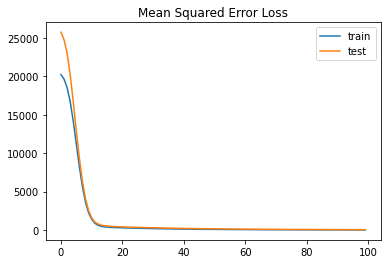

In [ ]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# generate regression dataset
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
train_y = train_y.reshape(len(train_y), 1)
test_y = test_y.reshape(len(train_y), 1)

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', 
              optimizer=Adam(learning_rate=0.01))

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_x, train_y, verbose=0)
test_mse = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Mean Squared Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Train: 11.171, Test: 43.399


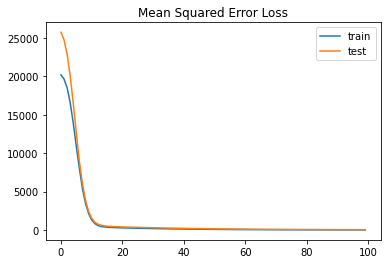

In [ ]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# generate regression dataset
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
train_y = train_y.reshape(len(train_y), 1)
test_y = test_y.reshape(len(train_y), 1)

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', 
              optimizer=Adam(learning_rate=0.01))

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=100, verbose=0,
                    callbacks=EarlyStopping(patience=10))

# evaluate the model
train_mse = model.evaluate(train_x, train_y, verbose=0)
test_mse = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Mean Squared Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Data Scaling

In [ ]:
# Constantes
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'values': [31],
        },
        'layer_2': {
            'values': [32],
        },
        'learn_rate': {
            'values': [0.03289311788009107],  
        },
        'optimizer': {
            'values': ['Adam']
        },
        'epoch': {
            'values': [800]
        },
        'batch_size': {
            'values': [32]
        },
        'scaler': {
            'values':['max_abs', 'min_max']
        }
    }
}

In [ ]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Data Scaling", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    if(config.scaler == 'max_abs'):
      scaler = MaxAbsScaler()
    elif(config.scaler == 'min_max'):
      scaler = MinMaxScaler(feature_range=(0,0.5))

    train_x = scaler.fit_transform(train_x)
    test_x = scaler.fit_transform(test_x)
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Instantiate a simple classification model
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='relu'))
    model.add(Dense(config.layer_2, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=config.optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Data Scaling")

Create sweep with ID: 1o9q89mr
Sweep URL: https://wandb.ai/talesv/Data%20Scaling/sweeps/1o9q89mr


In [ ]:
wandb.agent(sweep_id = sweep_id, function=train)

wandb: Agent Starting Run: yitcr6qe with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	scaler: max_abs
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 3s 3s/step - loss: 0.6741 - binary_accuracy: 0.7000 - val_loss: 0.6815 - val_binary_accuracy: 0.5857
Epoch 2/800
1/1 [==============================] - 0s 77ms/step - loss: 0.6689 - binary_accuracy: 0.7333 - val_loss: 0.6781 - val_binary_accuracy: 0.6286
Epoch 3/800
1/1 [==============================] - 0s 91ms/step - loss: 0.6637 - binary_accuracy: 0.7333 - val_loss: 0.6747 - val_binary_accuracy: 0.6571
Epoch 4/800
1/1 [==============================] - 0s 86ms/step - loss: 0.6586 - binary_accuracy: 0.8000 - val_loss: 0.6714 - val_binary_accuracy: 0.7143
Epoch 5/800
1/1 [==============================] - 0s 97ms/step - loss: 0.6536 - binary_accuracy: 0.8333 - val_loss: 0.6682 - val_binary_accuracy: 0.7286
Epoch 6/800
1/1 [==============================] - 0s 109ms/step - loss: 0.6486 - binary_accuracy: 0.9333 - val_loss: 0.6650 - val_binary_accuracy: 0.7286
Epoch 7/800
1/1 [==============================] - 0s 90ms/step - loss: 0.643

wandb: Agent Starting Run: m0kowg9i with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 31
wandb: 	layer_2: 32
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	scaler: min_max
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 967ms/step - loss: 0.6826 - binary_accuracy: 0.8667 - val_loss: 0.6849 - val_binary_accuracy: 0.7429
Epoch 2/800
1/1 [==============================] - 0s 98ms/step - loss: 0.6800 - binary_accuracy: 0.8667 - val_loss: 0.6832 - val_binary_accuracy: 0.7429
Epoch 3/800
1/1 [==============================] - 0s 76ms/step - loss: 0.6774 - binary_accuracy: 0.9000 - val_loss: 0.6815 - val_binary_accuracy: 0.7429
Epoch 4/800
1/1 [==============================] - 0s 75ms/step - loss: 0.6748 - binary_accuracy: 0.9000 - val_loss: 0.6798 - val_binary_accuracy: 0.7571
Epoch 5/800
1/1 [==============================] - 0s 97ms/step - loss: 0.6722 - binary_accuracy: 0.9333 - val_loss: 0.6782 - val_binary_accuracy: 0.7429
Epoch 6/800
1/1 [==============================] - 0s 97ms/step - loss: 0.6697 - binary_accuracy: 0.9333 - val_loss: 0.6765 - val_binary_accuracy: 0.7571
Epoch 7/800
1/1 [==============================] - 0s 90ms/step - loss: 0.6

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Link para o resultado:

https://wandb.ai/talesv/Data%20Scaling?workspace=user-talesv

# Vanishing Gradients

In [ ]:
# Mudança no numero de nós por camada
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'values': [25], #Setar os números de nós para 25 como sugerido
        },
        'learn_rate': {
            'values': [0.03289311788009107],  
        },
        'optimizer': {
            'values': ['Adam']
        },
        'epoch': {
            'values': [800]
        },
        'batch_size': {
            'values': [32]
        }
    }
}

In [ ]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MaxAbsScaler

# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Vanishing Gradient", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    """Sem normalização
    scaler = MaxAbsScaler()

    train_x = scaler.fit_transform(train_x)
    test_x = scaler.fit_transform(test_x)"""
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Adicionando mais camadas e mudando a função de ativação pra tanh
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=config.optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Vanishing Gradient")

Create sweep with ID: bu6vcx0j
Sweep URL: https://wandb.ai/talesv/Vanishing%20Gradient/sweeps/bu6vcx0j


In [ ]:
wandb.agent(sweep_id = sweep_id, function=train)

wandb: Agent Starting Run: tyr7rrhh with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 25
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 0.6722 - binary_accuracy: 0.7000 - val_loss: 0.6534 - val_binary_accuracy: 0.7000
Epoch 2/800
1/1 [==============================] - 0s 106ms/step - loss: 0.6304 - binary_accuracy: 0.8667 - val_loss: 0.6305 - val_binary_accuracy: 0.7000
Epoch 3/800
1/1 [==============================] - 0s 137ms/step - loss: 0.5915 - binary_accuracy: 0.8667 - val_loss: 0.6102 - val_binary_accuracy: 0.7000
Epoch 4/800
1/1 [==============================] - 0s 102ms/step - loss: 0.5555 - binary_accuracy: 0.8667 - val_loss: 0.5922 - val_binary_accuracy: 0.7000
Epoch 5/800
1/1 [==============================] - 0s 145ms/step - loss: 0.5223 - binary_accuracy: 0.8667 - val_loss: 0.5763 - val_binary_accuracy: 0.7000
Epoch 6/800
1/1 [==============================] - 0s 100ms/step - loss: 0.4920 - binary_accuracy: 0.9000 - val_loss: 0.5623 - val_binary_accuracy: 0.7143
Epoch 7/800
1/1 [==============================] - 0s 116ms/step - loss: 

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Resultado:

https://wandb.ai/talesv/Vanishing%20Gradient/sweeps/bu6vcx0j

Vanishing Gradient com Scaling e Clipping
---

In [ ]:
# Config do min_max_scaler e clipping
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'values': [25], #Setar os números de nós para 25 como sugerido
        },
        'learn_rate': {
            'values': [0.03289311788009107],  
        },
        'optimizer': {
            'values': ['Adam']
        },
        'epoch': {
            'values': [800]
        },
        'batch_size': {
            'values': [32]
        },
        'porcentagem_clip': {
            'values': [0.1, 0.2, 0.4]
        }
    }
}

In [ ]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MaxAbsScaler

# The sweep calls this function with each set of hyperparameters
def train():
    # Initialize a new wandb run
    wandb.init(project="Vanishing Gradient Clipping Norm", config= None)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    from sklearn.datasets import make_moons
    # generate 2d classification dataset
    x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

    # split into train and test sets
    n_train = 30
    train_x, test_x = x[:n_train, :], x[n_train:, :]
    train_y, test_y = y[:n_train], y[n_train:]

    scaler = MinMaxScaler(feature_range=(-1,1))

    train_x = scaler.fit_transform(train_x)
    test_x = scaler.fit_transform(test_x)
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Adicionando mais camadas e mudando a função de ativação pra tanh
    model = Sequential()
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(config.layer_1, input_dim=2, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # Optimizer com clipping
    opt = Adam(lr=config.learn_rate, clipvalue=config.porcentagem_clip)
    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer= opt, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback()]
              )   

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity = "talesv",project="Vanishing Gradient Clipping Norm")

Create sweep with ID: 9dj5gyvt
Sweep URL: https://wandb.ai/talesv/Vanishing%20Gradient%20Clipping%20Norm/sweeps/9dj5gyvt


In [ ]:
wandb.agent(sweep_id = sweep_id, function=train,count=3)

wandb: Agent Starting Run: j2gxapem with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 25
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	porcentagem_clip: 0.1
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 0.7699 - binary_accuracy: 0.2000 - val_loss: 0.5260 - val_binary_accuracy: 0.7143
Epoch 2/800
1/1 [==============================] - 0s 39ms/step - loss: 0.2531 - binary_accuracy: 0.8667 - val_loss: 0.7077 - val_binary_accuracy: 0.7714
Epoch 3/800
1/1 [==============================] - 0s 67ms/step - loss: 0.1994 - binary_accuracy: 0.9667 - val_loss: 0.8655 - val_binary_accuracy: 0.7857
Epoch 4/800
1/1 [==============================] - 0s 67ms/step - loss: 0.3220 - binary_accuracy: 0.8667 - val_loss: 1.0191 - val_binary_accuracy: 0.7714
Epoch 5/800
1/1 [==============================] - 0s 62ms/step - loss: 0.1865 - binary_accuracy: 0.9667 - val_loss: 0.9438 - val_binary_accuracy: 0.7571
Epoch 6/800
1/1 [==============================] - 0s 41ms/step - loss: 0.2134 - binary_accuracy: 0.9333 - val_loss: 0.6697 - val_binary_accuracy: 0.7857
Epoch 7/800
1/1 [==============================] - 0s 53ms/step - loss: 0.1614 - binary_ac

wandb: Agent Starting Run: gt2zbnsg with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 25
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	porcentagem_clip: 0.2
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 2s 2s/step - loss: 0.5953 - binary_accuracy: 0.8667 - val_loss: 0.5137 - val_binary_accuracy: 0.7571
Epoch 2/800
1/1 [==============================] - 0s 87ms/step - loss: 0.2088 - binary_accuracy: 0.9667 - val_loss: 0.8558 - val_binary_accuracy: 0.7857
Epoch 3/800
1/1 [==============================] - 0s 82ms/step - loss: 0.1591 - binary_accuracy: 0.9667 - val_loss: 1.0171 - val_binary_accuracy: 0.7571
Epoch 4/800
1/1 [==============================] - 0s 102ms/step - loss: 0.1645 - binary_accuracy: 0.9667 - val_loss: 1.0478 - val_binary_accuracy: 0.7571
Epoch 5/800
1/1 [==============================] - 0s 87ms/step - loss: 0.1617 - binary_accuracy: 0.9667 - val_loss: 0.9818 - val_binary_accuracy: 0.7571
Epoch 6/800
1/1 [==============================] - 0s 82ms/step - loss: 0.1524 - binary_accuracy: 0.9667 - val_loss: 0.8522 - val_binary_accuracy: 0.7571
Epoch 7/800
1/1 [==============================] - 0s 100ms/step - loss: 0.1423 - binary_

wandb: Agent Starting Run: 5zmhu7ln with config:
wandb: 	batch_size: 32
wandb: 	epoch: 800
wandb: 	layer_1: 25
wandb: 	learn_rate: 0.03289311788009107
wandb: 	optimizer: Adam
wandb: 	porcentagem_clip: 0.4
wandb: WARNING Ignored wandb.init() arg project when running a sweep
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/800


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 0.7835 - binary_accuracy: 0.1333 - val_loss: 0.4427 - val_binary_accuracy: 0.8286
Epoch 2/800
1/1 [==============================] - 0s 100ms/step - loss: 0.3432 - binary_accuracy: 0.8667 - val_loss: 0.6523 - val_binary_accuracy: 0.7571
Epoch 3/800
1/1 [==============================] - 0s 67ms/step - loss: 0.1761 - binary_accuracy: 0.9667 - val_loss: 1.0760 - val_binary_accuracy: 0.7714
Epoch 4/800
1/1 [==============================] - 0s 74ms/step - loss: 0.1868 - binary_accuracy: 0.9667 - val_loss: 1.1243 - val_binary_accuracy: 0.7571
Epoch 5/800
1/1 [==============================] - 0s 58ms/step - loss: 0.1749 - binary_accuracy: 0.9667 - val_loss: 1.0490 - val_binary_accuracy: 0.7571
Epoch 6/800
1/1 [==============================] - 0s 61ms/step - loss: 0.1667 - binary_accuracy: 0.9667 - val_loss: 0.9589 - val_binary_accuracy: 0.7571
Epoch 7/800
1/1 [==============================] - 0s 57ms/step - loss: 0.1467 - binary_a

Resultados:

https://wandb.ai/talesv/Vanishing%20Gradient%20Clipping%20Norm?workspace=user-talesv